## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [136]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [137]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [138]:
print("number of rows in the dataset",df.shape[0])

number of rows in the dataset 294478


c. The number of unique users in the dataset.

In [139]:
print("number of unique users in the dataset",df['user_id'].nunique())

number of unique users in the dataset 290584


d. The proportion of users converted.

In [140]:
print("proportion of users converted",df['converted'].mean())

proportion of users converted 0.11965919355605512


e. The number of times the `new_page` and `treatment` don't line up.

In [141]:
print("number of times the new_page and treatment don't line up",
      len(df.query('group == "treatment" and landing_page == "old_page"')))

number of times the new_page and treatment don't line up 1965


f. Do any of the rows have missing values?

In [143]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [144]:
df.drop(df.query("group == 'treatment' and landing_page == 'old_page'").index, inplace=True)

df.drop(df.query("group == 'control' and landing_page == 'new_page'").index, inplace=True)
df2 = df

In [145]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [146]:
print("Number unique user_ids are in df2",df2['user_id'].nunique())

Number unique user_ids are in df2 290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [160]:
print(df2[df2.duplicated(['user_id'])].user_id)


2893    773192
Name: user_id, dtype: int64


one user_id repeated in df2 is 773192

c. What is the row information for the repeat **user_id**? 

In [161]:
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [162]:
df2 = df2[df2["timestamp"] != "2017-01-09 05:37:58.781806"]

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [164]:
print("The probability of an individual converting regardless of the page they receive",df2['converted'].mean())

The probability of an individual converting regardless of the page they receive 0.11959708724499628


b. Given that an individual was in the `control` group, what is the probability they converted?

In [166]:
df2.groupby('group').mean()

,user_id,converted
group,,
control,788164.072594,0.120386
treatment,787845.719290,0.118808


Probablity of individual was in control group and they converted is 0.120386

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [167]:
df2.groupby('group').mean()

,user_id,converted
group,,
control,788164.072594,0.120386
treatment,787845.719290,0.118808


Probablity of individual was in treatment group and they converted is 0.118807

d. What is the probability that an individual received the new page?

In [169]:
print("The probability that an individual received the new page",len(df2[df2["group"] == 'treatment'])/df2.shape[0])

The probability that an individual received the new page 0.5000619442226688


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

####  Given an individual received the control page, the probability of converting is: 12.04% 
####  Given that an individual received the treatment page, the probability of converting is: 11.88% 
####  The probability of receiving the new page is: 50.01%
#### We are able to find that old page does better , but by a very small margin.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

#### Hypothesis

##### $H_{0}$ : $p_{new}$ <= $p_{old}$
##### $H_{1}$ : $p_{new}$ > $p_{old}$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [175]:
p_new = df2['converted'].mean()
print("The convert rate for  𝑝𝑛𝑒𝑤  under the null",p_new)

The convert rate for  𝑝𝑛𝑒𝑤  under the null 0.11959708724499628


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [176]:
p_old = df2['converted'].mean()
print("The convert rate for  𝑝𝑜𝑙𝑑  under the null",p_old)

The convert rate for  𝑝𝑜𝑙𝑑  under the null 0.11959708724499628


c. What is $n_{new}$?

In [177]:
n_new = len(df2.query("group == 'treatment'"))
print("𝑛𝑛𝑒𝑤 = ",n_new)

𝑛𝑛𝑒𝑤 =  145310


d. What is $n_{old}$?

In [179]:
n_old = len(df2.query("group == 'control'"))
print("𝑛𝑜𝑙𝑑 = ",n_old)

𝑛𝑜𝑙𝑑 =  145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [180]:
new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_new, (1-p_new)])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [181]:
old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_old, (1-p_old)])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [184]:
print("𝑝𝑛𝑒𝑤  -  𝑝𝑜𝑙𝑑  for your simulated values from part (e) and (f) is ",new_page_converted.mean() - old_page_converted.mean())

𝑝𝑛𝑒𝑤  -  𝑝𝑜𝑙𝑑  for your simulated values from part (e) and (f) is  0.0009891524637696963


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [185]:
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_new, (1-p_new)]).mean()
    old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_old, (1-p_old)]).mean()
    diff = new_page_converted - old_page_converted 
    p_diffs.append(diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

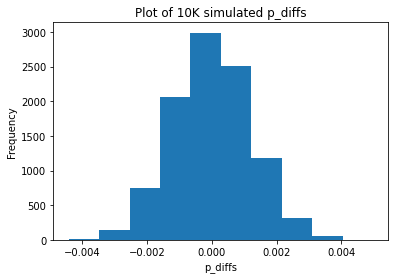

In [186]:
plt.hist(p_diffs)
plt.title('Plot of 10K simulated p_diffs');
plt.xlabel('p_diffs')
plt.ylabel('Frequency')
plt.show()

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [187]:
act_diff = df[df['group'] == 'treatment']['converted'].mean() -  df[df['group'] == 'control']['converted'].mean()
print("Proportion of the p_diffs are greater than the actual difference observed in ab_data.csv is ",act_diff)

Proportion of the p_diffs are greater than the actual difference observed in ab_data.csv is  -0.0015790565976871451


0.9061


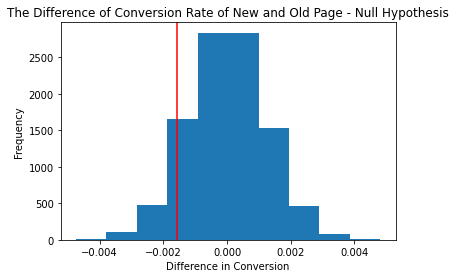

In [130]:
p_diffs = np.array(p_diffs)
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)
plt.hist(null_vals);
plt.axvline(act_diff, color = 'r')
print((act_diff < p_diffs).mean())
plt.title('The Difference of Conversion Rate of New and Old Page - Null Hypothesis')
plt.xlabel('Difference in Conversion')
plt.ylabel('Frequency')
plt.legend
plt.show()

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [188]:
import statsmodels.api as sm

convert_old = sum(df2.query("group == 'control'")['converted'])
convert_new = sum(df2.query("group == 'treatment'")['converted'])
n_old = len(df2.query("group == 'control'"))
n_new = len(df2.query("group == 'treatment'")) 

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [191]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
print("Z Score = ",z_score,", p value = ",p_value)


Z Score =  1.3109241984234394 , p value =  0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [197]:
from scipy.stats import norm

print("Z-Score:          ",z_score, "\nCritical Z-Score: ", norm.ppf(1-(0.05)), "\nP-Value:          ", p_value)

Z-Score:           1.3109241984234394 
Critical Z-Score:  1.6448536269514722 
P-Value:           0.9050583127590245


we found that z-score of 1.31092419842 is less than the critical value of 1.64485362695. So, we accept the null hypothesis.
we find that old pages are only minutely better than new pages
These values agree with the findings in parts j. and k.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [72]:
df['intercept']=1
df[['control', 'treatment']] = pd.get_dummies(df['group'])

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [73]:
import statsmodels.api as sm
logit = sm.Logit(df['converted'],df[['intercept','treatment']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [74]:
results = logit.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290583
Method:                           MLE   Df Model:                            1
Date:                Mon, 29 Jun 2020   Pseudo R-squ.:               8.085e-06
Time:                        15:16:10   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1897
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
treatment     -0.0150      0.011     -1.312      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

Answer:

##### Hypothesis 
##### $H_{0}$ : $p_{new}$ - $p_{old}$ = 0
##### $H_{1}$ : $p_{new}$ - $p_{old}$ != 0

The p-value associated with ab_page is 0.19. This is because the approach of calculating the p-value is different for each case. For the first case we calculate the probability receiving a observed statistic if the null hypothesis is true. Therefore this is a one-sided test. However, the ab_page p-value is the result of a two sided test, because the null hypothesis for this case is, that there is no significant relationship between the conversion rate and ab_page. Therefore give us a variable with a low p value "a meaningful addition to your model because changes in the predictor's value are related to changes in the response variable"

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

Other features to consider could be extracts of the time stamp, for example the day of the week or the gender/income infrastructure (if this data would be available). This could lead to more precise results and a higher accuracy. The disadvantages are the increasing complexity of interpretation and the possible introduction of multicollinearity. However, the last problem can be solved with calculating the VIF's.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [75]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [76]:
### Create the necessary dummy variables
df_new[['CA', 'US']] = pd.get_dummies(df_new['country'])[['CA','US']]

df_new['country'].astype(str).value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [77]:
### Fit Your Linear Model And Obtain the Results
df['intercept'] = 1


log_mod = sm.Logit(df_new['converted'], df_new[['CA', 'US']])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.447174
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 29 Jun 2020   Pseudo R-squ.:                 -0.2214
Time:                        15:18:30   Log-Likelihood:            -1.2994e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
CA            -2.0375      0.026    -78.364      0.000      -2.088      -1.987
US            -1.9967      0.007   -292.314      0.000      -2.010      -1.983
==============================================================================
"""

In [78]:
np.exp(results.params)


CA    0.130350
US    0.135779
dtype: float64

In [79]:
df.groupby('group').mean()['converted']

group
control      0.120386
treatment    0.118807
Name: converted, dtype: float64

<a id='conclusions'></a>
## Conclusions


 The test conditions and the amount of data were ideal, there were not any missing or unconsistent data. The users have equal chance to get the old or the new page so both of the groups had similar size.

As a conclusion I can say that there is no evidence that the new page would work better that the old page and The performance of the old page was found better by small margin as computed by different techniques. so we fail to reject the null hypothesis. Moreover, there is a chance, that the old page actually works better. The p-value of ab_page has a little increased in the last model, while the countries have have roughly similar results. So, we could not even say that the countries could play a significant role as an additional factor in predicting the user preferences.

These inferences are strictly based on data on hand. This analysis acknowledges its limitations due to factors not included in the data.

The next steps could be to include other factors to our model to find out why the new page performed so poorly. 